In [31]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


import src.workout_tracker.constants as c

In [32]:
VIDEO_1_THRESHOLDS = (
    [3.0, "front-squats"],
    [9.5, "pause"],
    [16.0, "front-squats"],
    [26.0, "pause"],

)

VIDEO_2_THRESHOLDS = (
    [3.4, "side-squats"],
    [16.9, "pause"],

)

VIDEO_3_THRESHOLDS = (
    [8.0, "side-squats"],
    [18.0, "pause"],
    [32.5, "push-ups"],
    [38.3, "pause"],
    [46.0, "push-ups"],
    [56.5, "pause"],
)

VIDEO_4_THRESHOLDS = (
    [7.5, "push-ups"],
    [19.5, "pause"],
)

VIDEO_5_THRESHOLDS = (
    [8.8, "push-ups"],
    [11.0, "plank"],
    [28.3, "pause"],
)

VIDEO_6_THRESHOLDS = (
    [10.8, "side-squats"],
    [19.5, "pause"],
    [29.9, "front-squats"],
    [41.8, "pause"],
    [53.5, "push-ups"],
    [60.4, "pause"],
    [79.0, "plank"],
    [89.0, "pause"],

)

video_thresholds = [globals()[f"VIDEO_{i}_THRESHOLDS"] for i in range(1, 7)]

# Substract WARMUP_TIME from thresholds
for thresholds in video_thresholds:
    for idx in range(len(thresholds)):
        thresholds[idx][0] -= c.WARMUP_TIME


In [33]:
# Convert timestamp to seconds, normalizing by the first timestamp
def to_seconds(ts):
    # Handles both "HH:MM:SS.sss..." and "HH:MM:SS.ssssss" formats
    if "." in ts:
        t, ms = ts.split(".", 1)
        ms = "0." + ms
    else:
        t = ts
        ms = "0"
    h, m, s = map(int, t.split(":"))
    base = h * 3600 + m * 60 + s
    return base + float(ms)


def plot_logs(df, thresholds = None):

    df["timestamp_sec"] = df["timestamp"].apply(to_seconds)
    df["timestamp_sec"] -= df["timestamp_sec"].iloc[0]  # normalize to 0

    # df = df[(43 < df["timestamp_sec"]) & (df["timestamp_sec"] < 100)]

    fig = plt.figure(figsize=(12, 6))

    sns.lineplot(x="timestamp_sec", y="prob_pause", data=df, color="blue", label="pause", errorbar=None)
    sns.lineplot(x="timestamp_sec", y="prob_push-up", data=df, color="red", label="push-up", errorbar=None)
    sns.lineplot(x="timestamp_sec", y="prob_plank", data=df, color="green", label="plank", errorbar=None)
    sns.lineplot(x="timestamp_sec", y="prob_pull-up", data=df, color="purple", label="pull-up", errorbar=None)
    sns.lineplot(x="timestamp_sec", y="prob_squat", data=df, color="orange", label="squat", errorbar=None)

    # Draw dashed vertical lines at the thresholds
    if thresholds is not None:
        for threshold, label in thresholds:
            plt.axvline(x=threshold, color='black', linestyle='--', alpha=0.7)
            plt.text(threshold-1, 0.5, label, color='black', fontsize=12, ha='center', va='center', rotation=90)

    plt.xlabel("Time (s)")
    plt.ylabel("Probability")
    plt.xticks(
        ticks=df["timestamp_sec"][::max(1, len(df)//5)],
        labels=[f"{s:.1f}" for s in df["timestamp_sec"][::max(1, len(df)//5)]],
    )
    plt.legend(loc='lower right')

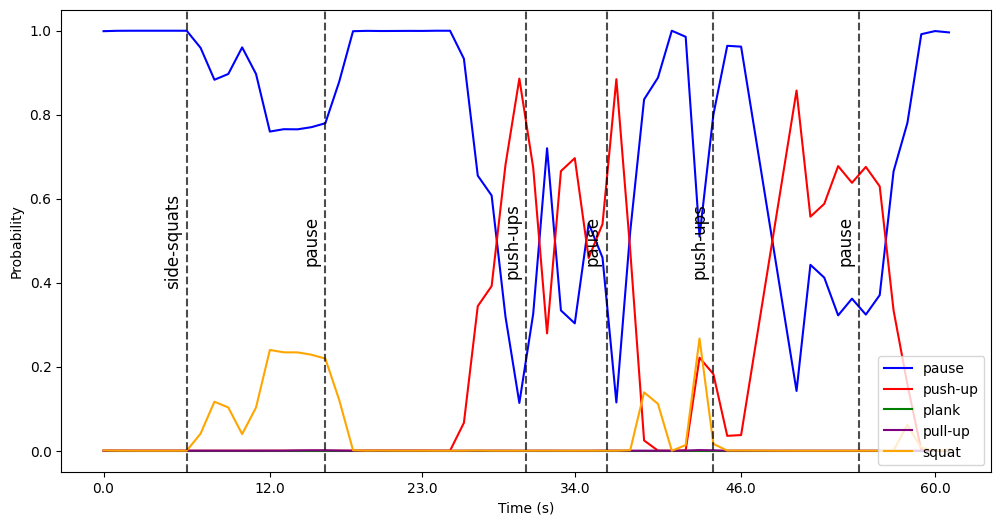

In [41]:
VIDEO_ID = 3
df = pd.read_csv(f"src/benchmark/manual_inspection/results/pretrained_{VIDEO_ID}.csv", sep=";")
# df = pd.read_csv("logs.csv", sep=";")

plot_logs(df, thresholds=video_thresholds[VIDEO_ID-1])